In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('India_emissions.csv')
df

,Country,Code,Year,Emissions (tonnes )
0,India,IND,2000,1029637759
1,India,IND,2001,1035640714
2,India,IND,2002,1047595651
3,India,IND,2003,1091873009
4,India,IND,2004,1145545234
5,India,IND,2005,1210145667
6,India,IND,2006,1287149211
7,India,IND,2007,1390253491
8,India,IND,2008,1547991039
9,India,IND,2009,1720120560


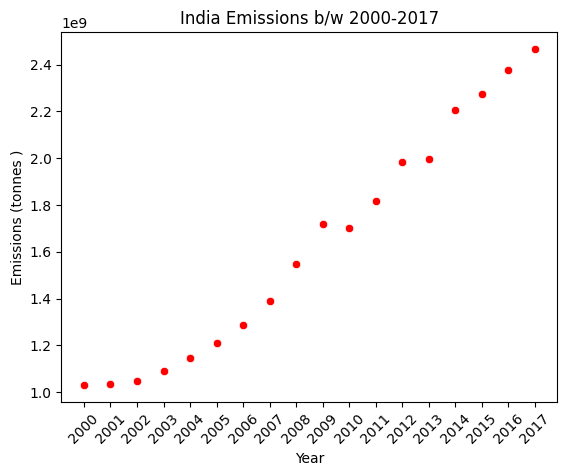

In [12]:
sns.scatterplot(x='Year',y='Emissions (tonnes )',data=df,color='red')
plt.xticks(ticks=df['Year'], labels=df['Year'], rotation=45) 
plt.title('India Emissions b/w 2000-2017')
plt.show()

# Train and Test Data

In [16]:
X=df[['Year']]
Y=df['Emissions (tonnes )']

In [17]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [25]:
from sklearn.linear_model import LinearRegression
obj=LinearRegression()
obj.fit(X_train,Y_train)
obj.score(X_test,Y_test)

0.9421719447274604

In [26]:
obj.predict([[2017]])

C:\Users\ABHAY\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.40384422e+09])

In [27]:
df[df['Year']==2017]

,Country,Code,Year,Emissions (tonnes )
17,India,IND,2017,2466765373


In [35]:
data=obj.predict(df[['Year']])
data=pd.DataFrame(data,columns='Emission')
data

TypeError: Index(...) must be called with a collection of some kind, 'Emission' was passed

In [ ]:
sns.scatterplot(x='Year',y='Emissions (tonnes )',data=df,color='red')
plt.xticks(ticks=df['Year'], labels=df['Year'], rotation=45) 
plt.title('India Emissions b/w 2000-2017')
plt.show()